In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, gamma, norm, binom, uniform, t
import numdifftools as nd
from sklearn.linear_model import LinearRegression as linreg
import sympy as sym
from scipy.optimize import brentq, minimize
from datetime import datetime as dt

ModuleNotFoundError: No module named 'numdifftools'

# Bayesian Inference

$\pi(\theta|\mathbf{x})\propto L(\theta|\mathbf{x})\pi(\theta)=\prod_{i=1}^nf(x_i|\theta)\pi(\theta)$, what will happen if $n$ is very large? 

## Normal example
Assume model $f(x|\mu)=N(x|\mu, \sigma^2)$ and prior $\pi(\mu)=N(\mu|\mu_0, \sigma_0^2)$, where the variance $\sigma^2$ is known. 

With $n$ samples $\mathbf{x}=(x_1,\dots,x_n)$ from the model, we have the sample mean $ \bar{x}_n$, and the corresponding variance  $\sigma_n^2 = \sigma^2/n$. 

The posterior of $\mu$ is still normal, i.e., 
$$
\pi(\mu|\mathbf{x})=N\left( \frac{\sigma_0^2 \bar{x}_n+\mu_0 \sigma_n^2 }{\sigma_0^2+\sigma_n^2}, 
\frac{\sigma_0^2 \sigma_n^2}{\sigma_0^2+\sigma_n^2} \right)
$$

A prior is just like the regularization in Machine Learning. It serves as bias–variance tradeoff method and always results in more bias but less variance. 

## Beta prior and Binomial model (Conjugate prior example)


Assume model $f(y|p)=Binomial(y|n,p)$ and prior $\pi(p)=Beta(p|\alpha, \beta)$. 

With $1$ sample $y$ from the Binomial model (or equivalently $n$ samples $\mathbf{x}=(x_1,\dots,x_n)$ ($y=\sum_{i=1}^nx_i)$ from a Bernoulli model $f(x|p)=Bernoulli(x|p)$), we have the posterior: 
$$
\pi(p|y)=\pi(p|\mathbf{x})=Beta(p|\alpha+y, \beta+n-y)
$$


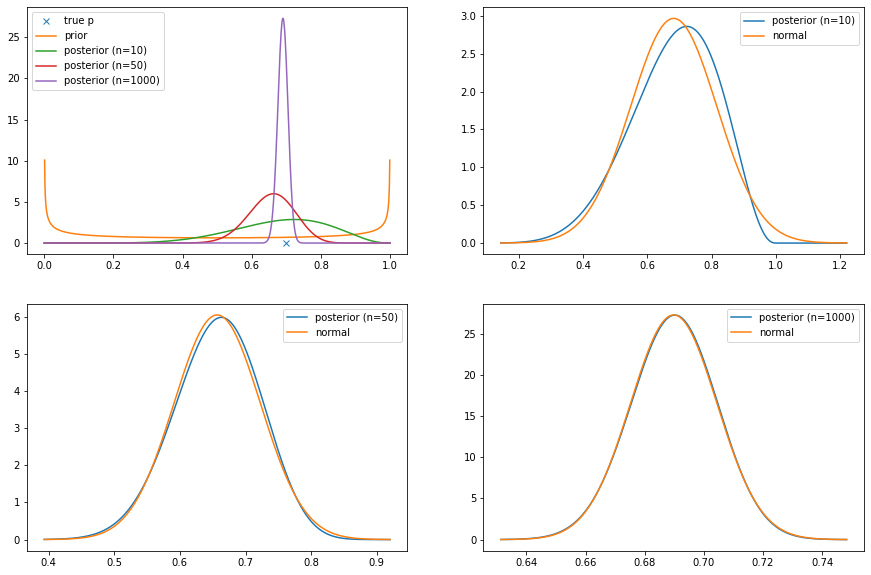

In [2]:
np.random.seed(0)
a, b = 0.5, 0.5
p = 0.7
fig, axs = plt.subplots(2, 2, figsize = (15, 10))
axs = axs.flatten()

xx = np.linspace(0, 1, 1000)
axs[0].plot(p, 0, 'x', label='true p')
axs[0].plot(xx, beta.pdf(x=xx, a=a, b=b), label='prior')

for i, n in enumerate([10, 50, 1000]):
    y = binom.rvs(n=n, p=p) # number of success
    posterior = beta(a=a+y, b=b+n-y)
    axs[0].plot(xx, posterior.pdf(xx), label='posterior (n={})'.format(n))
    
    loc = posterior.mean()
    scale = posterior.std()
    xx_zoomin = np.linspace(loc - 4*scale, loc + 4*scale, 1000)
    axs[i+1].plot(xx_zoomin, posterior.pdf(xx_zoomin), label='posterior (n={})'.format(n))
    axs[i+1].plot(xx_zoomin, norm.pdf(xx_zoomin, loc=loc, scale=scale), label='normal'.format(n))

for ax in axs:
    ax.legend()
    
plt.show()

Under certain regularity conditions, the posterior distribution approaches a Gaussian as the number of samples grows (CLT) (refer to this book http://www.stat.columbia.edu/~gelman/book/). This justifies the application of Laplace's method. 

**Think further:** Can you construct a simple example where this Gaussian phenomenon wouldn't appear? Is there any other Gaussian phenomenon appear in your example? 

In [6]:
for i, n in enumerate([10, 50, 1000]):
    print(i,n)

0 10
1 50
2 1000
